<a href="https://colab.research.google.com/github/avijit7074/price_prediction_gurgaon/blob/master/gurgaon_flat_house_joined1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
flats=pd.read_csv('/content/gurgaon_flat_csv_1')
houses=pd.read_csv('/content/gurgaon_house_csv_1')

In [4]:
df=pd.concat([flats,houses], ignore_index=True)

In [5]:
df=pd.read_csv('/content/gurgaon_flat_house_joined1_uncleaned')

In [6]:
df.to_csv('gurgaon_flat_house_joined1_uncleaned',index=False)

In [7]:
df.shape

(3940, 21)

features to drop-> 'property_name','address','description','rating'
property_name-> it's not relevent for my prediction.
'address'-> necessary information is extracted from address and made a new column named 'sector'.
description-> since I am not doing NLP related things so I fill it's not necessary.
rating-> Number of total reviews are not sufficient to justify the rating. Most of the cases it's less than 50.
Also in the final product there will be nothing related to rating.

In [8]:
df.drop(columns=['property_name','address','description','rating'], inplace=True)

In [9]:
df.shape

(3940, 17)

In [10]:
df.head()

property_type                 society     sector  price_in_cr  \
0          flat  maa bhagwati residency   sector 3         0.45   
1          flat            apna enclave   sector 3         0.50   
2          flat  tulsiani easy in homes  sector 35         0.40   
3          flat     smart world orchard  sector 61         1.47   
4          flat        parkwood westend  sector 92         0.70   

   price_per_sq.ft  total_area                            areaWithType  \
0           5000.0      900.00          Carpet area: 900 (83.61 sq.m.)   
1           7692.0      650.03          Carpet area: 650 (60.39 sq.m.)   
2           6722.0      595.06          Carpet area: 595 (55.28 sq.m.)   
3          12250.0     1200.00        Carpet area: 1200 (111.48 sq.m.)   
4           5204.0     1345.12  Super Built up area 1345(124.95 sq.m.)   

   bedrooms  bathrooms balconies  additionalRoom  floorNum facing  \
0         2          2         1  not applicable       4.0   West   
1         2          2         1  not applicable       1.0   West   
2         2          2         3  not applicable      12.0    NaN   
3         2          2         2      Study Room       2.0    NaN   
4         2          2         3      Study Room       5.0    NaN   

        agePossession  \
0     1 to 5 Year Old   
1        10+ Year Old   
2     0 to 1 Year Old   
3              Dec-23   
4  Under Construction   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispec

In [11]:
df[['price_in_cr','price_per_sq.ft','total_area','areaWithType']].sample(5)

price_in_cr  price_per_sq.ft  total_area  \
669          1.12           6215.0     1802.09   
880          1.95           9972.0     1955.48   
382          2.10          11938.0     1759.09   
529          0.87           5513.0     1578.09   
3078         3.10          13778.0     2249.96   

                                areaWithType  
669   Super Built up area 1802(167.41 sq.m.)  
880   Super Built up area 1805(167.69 sq.m.)  
382         Carpet area: 1759 (163.42 sq.m.)  
529    Super Built up area 1578(146.6 sq.m.)  
3078             Plot area 250(209.03 sq.m.)

In [12]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [13]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [14]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [15]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [16]:
df.sample()

property_type               society     sector  price_in_cr  \
593          flat  dlf new town heights  sector 90         1.25   

     price_per_sq.ft  total_area  \
593           6476.0      1930.2   

                                                                                                              areaWithType  \
593  Super Built up area 1930(179.3 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.)   

     bedrooms  bathrooms balconies           additionalRoom  floorNum  \
593         3          3        3+  Pooja Room,Servant Room      17.0   

         facing    agePossession  \
593  South-East  1 to 5 Year Old   

                                                                                                                                   nearbyLocations  \
593  ['Manish Gallexie 91', 'NH-8 IMT Manesar', 'RHM Public School', 'Silver Streak Multi Speciality Hospital', 'Airport', 'Holiday Inn Gurugram']   

    furnishDetails  \
593            NaN   

                                                                                                                                                                                                                                 features  \
593  ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']   

     super_built_up_area  built_up_area  carpet_area  
593               1930.0         1700.0       1500.0

In [17]:
df[['price_in_cr','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

price_in_cr property_type  total_area  \
175         1.750          flat     2800.00   
1161        0.285          flat      489.02   
1840        1.700          flat     1745.02   
2568        0.950          flat     1530.04   
3074        7.000         house     3239.99   

                                                                      areaWithType  \
175                                               Carpet area: 2800 (260.13 sq.m.)   
1161                                                Carpet area: 489 (45.43 sq.m.)   
1840  Super Built up area 1745(162.12 sq.m.)Built Up area: 1550 sq.ft. (144 sq.m.)   
2568                                        Super Built up area 1530(142.14 sq.m.)   
3074                                                   Plot area 360(301.01 sq.m.)   

      super_built_up_area  built_up_area  carpet_area  
175                   NaN            NaN       2800.0  
1161                  NaN            NaN        489.0  
1840               1745.0         1550.0          NaN  
2568               1530.0            NaN          NaN  
3074                  NaN            NaN          NaN

There are only 537 rows 'super_built_up_area','built_up_area' and 'carpet_area' all are some value.

In [18]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price_in_cr','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape


(537, 7)

In [19]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price_in_cr','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head()

price_in_cr property_type  total_area  \
37          0.78          flat     1365.07   
103         2.10          flat     2000.00   
134         0.90          flat     1950.16   
137         0.90          flat     1529.83   
142         1.15          flat     2000.00   

                                                                                                               areaWithType  \
37    Super Built up area 1365(126.81 sq.m.)Built Up area: 1068.1 sq.ft. (99.23 sq.m.)Carpet area: 900 sq.ft. (83.61 sq.m.)   
103  Super Built up area 2000(185.81 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.)   
134  Super Built up area 1950(181.16 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1854 sq.ft. (172.24 sq.m.)   
137  Super Built up area 1530(142.14 sq.m.)Built Up area: 1450 sq.ft. (134.71 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.)   
142  Super Built up area 2500(232.26 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.)Carpet area: 1750 sq.ft. (162.58 sq.m.)   

     super_built_up_area  built_up_area  carpet_area  
37                1365.0         1068.1        900.0  
103               2000.0         1600.0       1500.0  
134               1950.0         1900.0       1854.0  
137               1530.0         1450.0       1400.0  
142               2500.0         2000.0       1750.0

There are 750 rows containing Plot area.

In [20]:
df[df['areaWithType'].str.contains('Plot')][['price_in_cr','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(750, 7)

In [21]:
df[df['areaWithType'].str.contains('Plot')][['price_in_cr','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)


price_in_cr property_type  total_area                 areaWithType  \
2995         5.25         house     2609.99  Plot area 290(242.48 sq.m.)   
2996         5.70         house      539.00   Plot area 539(50.07 sq.m.)   
2997         2.10         house      549.01       Plot area 61(51 sq.m.)   
2998         5.00         house     1161.01  Plot area 129(107.86 sq.m.)   
2999         3.00         house      558.00    Plot area 62(51.84 sq.m.)   

      super_built_up_area  built_up_area  carpet_area  
2995                  NaN            NaN          NaN  
2996                  NaN            NaN          NaN  
2997                  NaN            NaN          NaN  
2998                  NaN            NaN          NaN  
2999                  NaN            NaN          NaN

In [22]:
pd.reset_option('display.max_colwidth')

In [23]:
houses.sample(5)

property_name property_type  \
661      5 Bedroom House for sale in Sector 50 Gurgaon         house   
527  7 Bedroom House for sale in Ashok Vihar Phase ...         house   
811      4 Bedroom House for sale in Sector 46 Gurgaon         house   
866            3 Bedroom House for sale in DLF Phase 1         house   
890      5 Bedroom House for sale in Sector 14 Gurgaon         house   

                             society     sector  price_in_cr  price_per_sq.ft  \
661                      ss hibiscus  sector 50        12.25          20940.0   
527  ashok vihar phase iii extension   sector 3         0.40           8889.0   
811                      independent  sector 46         2.25          24510.0   
866                      independent  sector 26         4.50          33333.0   
890                      independent  sector 14         6.46          18889.0   

     total_area                                       areaWithType  bedrooms  \
661     5850.05                       Plot area 5850(543.48 sq.m.)         5   
527      449.99                          Plot area 50(41.81 sq.m.)         7   
811      917.99  Plot area 102(85.28 sq.m.)Built Up area: 90 sq...         4   
866     1350.01                        Plot area 150(125.42 sq.m.)         3   
890     3419.98  Plot area 380(317.73 sq.m.)Built Up area: 380 ...         5   

     bathrooms balconies                             additionalRoom  \
661          7        3+  Pooja Room,Study Room,Servant Room,Others   
527          4        3+                                 Pooja Room   
811          3         3                                 Study Room   
866          3         2                                 Pooja Room   
890          5         2         Pooja Room,Study Room,Servant Room   

                                               address  floorNum      facing  \
661          A-23, Sector 50 Gurgaon, Gurgaon, Haryana       1.0  South-East   
527  House No.183, Street Number 7, Ashok Vihar Pha...       4.0         NaN   
811           204, Sector 46 Gurgaon, Gurgaon, Haryana       3.0  North-East   
866                      DLF Phase 1, Gurgaon, Haryana       2.0        West   
890       0001725, Sector 14 Gurgaon, Gurgaon, Haryana       3.0        East   

        agePossession                                    nearbyLocations  \
661   1 to 5 Year Old  ['Baani Square', 'SS Plaza', 'Good Earth City ...   
527   0 to 1 Year Old  ['Palam Vihar Vyapar kendra', 'Palam triangle'...   
811   1 to 5 Year Old  ['Axis bank ATM', 'State bank of india ATM', '...   
866      10+ Year Old  ['Guru dronacharya metro station', 'Dlf phase ...   
890  5 to 10 Year Old  ['Sheetla Mata Mandir', 'Hsbc bank ATM', 'Hdfc...   

                                           description  \
661  Rare inventory \nSs hibiscus villa \n650 yards...   
527  It's a newly built house which has 4 floors, 1...   
811  This house is a good loction near park , schoo...   
866  300 sqyds facing150 sqyd built up for sale 12 ...   
890  House for sale plot size 380 sqyard 2 story ho...   

                                        furnishDetails  \
661  ['1 Water Purifier', '1 Fan', '1 Exhaust Fan',...   
527  ['3 Fan', '15 Light', '1 Wardrobe', 'No AC', '...   
811  ['3 Fan', '1 Exhaust Fan', '2 Geyser', '5 Ligh...   
866  ['3 Wardrobe', '1 Water Purifier', '4 Fan', '1...   
890  ['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '6 G...   

                                              features  \
661  ['Centrally Air Conditioned', 'Water purifier'...   
527                                  ['Water Storage']   
811  ['Feng Shui / Vaastu Compliant', 'False Ceilin...   
866  ['Feng Shui / Vaastu Compliant', 'Private Gard...   
890  ['Maintenance Staff', 'Water Storage', 'Visito...   

                                                rating  
661  ['Environment5 out of 5', 'Lifestyle5 out of 5...  
527  ['Environment3 out of 5', 'Lifestyle4 out of 5...  
811  ['Environment4 out of 5', 'Safety4 out of 5', ...  


I made a dataframe where have only plot area.

In [24]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price_in_cr','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [25]:
all_nan_df.head()

price_in_cr property_type  total_area                 areaWithType  \
2995         5.25         house     2609.99  Plot area 290(242.48 sq.m.)   
2996         5.70         house      539.00   Plot area 539(50.07 sq.m.)   
2997         2.10         house      549.01       Plot area 61(51 sq.m.)   
2998         5.00         house     1161.01  Plot area 129(107.86 sq.m.)   
2999         3.00         house      558.00    Plot area 62(51.84 sq.m.)   

      super_built_up_area  built_up_area  carpet_area  
2995                  NaN            NaN          NaN  
2996                  NaN            NaN          NaN  
2997                  NaN            NaN          NaN  
2998                  NaN            NaN          NaN  
2999                  NaN            NaN          NaN

Collecting all the indices to modify in the main dataframe.

In [26]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price_in_cr','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [27]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

Filling the built_up_area by plot_area. By using 'extract_plot_area' this function.

In [28]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

Taing round value of 'total_area' for both the dataframe.

In [29]:
df['total_area']=round(df['total_area'])
all_nan_df['total_area']=round(all_nan_df['total_area'])

In [30]:
all_nan_df.head()

price_in_cr property_type  total_area                 areaWithType  \
2995         5.25         house      2610.0  Plot area 290(242.48 sq.m.)   
2996         5.70         house       539.0   Plot area 539(50.07 sq.m.)   
2997         2.10         house       549.0       Plot area 61(51 sq.m.)   
2998         5.00         house      1161.0  Plot area 129(107.86 sq.m.)   
2999         3.00         house       558.0    Plot area 62(51.84 sq.m.)   

      super_built_up_area  built_up_area  carpet_area  
2995                  NaN          290.0          NaN  
2996                  NaN          539.0          NaN  
2997                  NaN           61.0          NaN  
2998                  NaN          129.0          NaN  
2999                  NaN           62.0          NaN

The plot area for some of the house given in sq.yards and some of in sq.meters.
plot_area conversion-
if total_area/built_up_area==9.0 => built_up_area*9
if total_area/built_up_area==11.0 => built_up_area*10.7
other wise left built_up_area as it is.

In [31]:
def convert_scale(row):
    if np.isnan(row['total_area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['total_area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['total_area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [32]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [33]:
all_nan_df

price_in_cr property_type  total_area                     areaWithType  \
2995       5.2500         house      2610.0      Plot area 290(242.48 sq.m.)   
2996       5.7000         house       539.0       Plot area 539(50.07 sq.m.)   
2997       2.1000         house       549.0           Plot area 61(51 sq.m.)   
2998       5.0000         house      1161.0      Plot area 129(107.86 sq.m.)   
2999       3.0000         house       558.0        Plot area 62(51.84 sq.m.)   
3000       4.5000         house      1152.0      Plot area 128(107.02 sq.m.)   
3001      12.0000         house      3240.0      Plot area 360(301.01 sq.m.)   
3002      20.0000         house      4091.0      Plot area 500(418.06 sq.m.)   
3003      10.8500         house      2844.0      Plot area 316(264.22 sq.m.)   
3004       1.9500         house      1935.0      Plot area 215(179.77 sq.m.)   
3005       4.4500         house      1350.0      Plot area 150(125.42 sq.m.)   
3006       9.0000         house      3240.0      Plot area 360(301.01 sq.m.)   
3007       5.0000         house      1467.0      Plot area 163(136.29 sq.m.)   
3008      15.0000         house      4518.0      Plot area 502(419.74 sq.m.)   
3009       8.2500         house      2700.0      Plot area 300(250.84 sq.m.)   
3010       2.0000         house      1341.0     Plot area 1341(124.58 sq.m.)   
3011      10.7500         house      3600.0      Plot area 400(334.45 sq.m.)   
3012       2.1000         house       900.0       Plot area 100(83.61 sq.m.)   
3013       7.3500         house      1760.0      Plot area 240(200.67 sq.m.)   
3014       4.4500         house      2880.0      Plot area 320(267.56 sq.m.)   
3015       3.4000         house      2628.0      Plot area 292(244.15 sq.m.)   
3016      12.0000         house      3150.0      Plot area 350(292.64 sq.m.)   
3017       8.4000         house      3240.0      Plot area 360(301.01 sq.m.)   
3018       8.5000         house      3240.0      Plot area 360(301.01 sq.m.)   
3019       7.6000         house      1961.0      Plot area 215(179.77 sq.m.)   
3020       7.0000         house      2700.0      Plot area 300(250.84 sq.m.)   
3021       4.7500         house      5067.0      Plot area 563(470.74 sq.m.)   
3022       3.5000         house      2610.0      Plot area 290(242.48 sq.m.)   
3023       5.0000         house      2367.0       Plot area 263(219.9 sq.m.)   
3024      10.5600         house      3240.0      Plot area 360(301.01 sq.m.)   
3025       5.4600         house      2259.0      Plot area 251(209.87 sq.m.)   
3026      10.0000         house      2700.0      Plot area 300(250.84 sq.m.)   
3027       9.0000         house      3159.0      Plot area 351(293.48 sq.m.)   
3028      10.0000         house       818.0       Plot area 900(83.61 sq.m.)   
3029       1.9500         house      1440.0      Plot area 160(133.78 sq.m.)   
3030       3.3000         house      1728.0      Plot area 192(160.54 sq.m.)   
3031      13.0000         house      2700.0      Plot area 300(250.84 sq.m.)   
3032       7.2000         house      3240.0      Plot area 359(300.17 sq.m.)   
3033       6.0000         house      2700.0      Plot area 300(250.84 sq.m.)   
3034       9.0000         house      2700.0      Plot area 300(250.84 sq.m.)   
3035       5.8000         house      1800.0      Plot area 200(167.23 sq.m.)   
3037       7.4900         house      2700.0      Plot area 300(250.84 sq.m.)   
3038      13.5000         house      2700.0      Plot area 300(250.84 sq.m.)   
3039      11.9500         house      2745.0      Plot area 305(255.02 sq.m.)   
3040      12.3900         house      2700.0      Plot area 300(250.84 sq.m.)   
3041       6.2500         house      1800.0      Plot area 200(167.23 sq.m.)   
3042       5.4000         house      2610.0      Plot area 290(242.48 sq.m.)   
3043       5.7500         house      1935.0      Plot area 215(179.77 sq.m.)   
3044       2.5500         house      1557.0      Plot area 173(144.65 sq.m.)   
3045  

In [34]:
df.update(all_nan_df)

In [35]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price_in_cr               0
price_per_sq.ft           0
total_area                0
areaWithType              0
bedrooms                  0
bathrooms                 0
balconies                 0
additionalRoom            0
floorNum                 19
facing                 1170
agePossession             1
nearbyLocations         206
furnishDetails         1026
features                705
super_built_up_area    2006
built_up_area          2111
carpet_area            1941
dtype: int64

In [36]:
df[['price_in_cr','property_type','total_area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

price_in_cr property_type  total_area  \
0          0.4500          flat       900.0   
1          0.5000          flat       650.0   
2          0.4000          flat       595.0   
3          1.4700          flat      1200.0   
4          0.7000          flat      1345.0   
5          0.4100          flat       654.0   
6          2.0000          flat      1500.0   
7          1.8000          flat      2290.0   
8          1.1000          flat      1350.0   
9          4.7500          flat      2813.0   
10         0.9600          flat       983.0   
11         0.2900          flat       519.0   
12         1.3500          flat      1945.0   
13         0.9500          flat      1385.0   
14         0.7000          flat      1300.0   
15         3.9500          flat      2343.0   
16         0.9000          flat       639.0   
17         1.0500          flat       915.0   
18         2.2000          flat      2100.0   
19         1.0100          flat      1103.0   
20         1.8500          flat      2150.0   
21         0.8600          flat      1103.0   
22         1.8500          flat      2025.0   
23         2.8500          flat      2217.0   
24         0.4200          flat       531.0   
25         6.1500          flat      3355.0   
26         6.2500          flat      2572.0   
27         0.4200          flat       750.0   
28         1.3500          flat      1056.0   
29         1.6000          flat       594.0   
30         3.2500          flat      3200.0   
31         0.4500          flat       626.0   
32         0.8500          flat      1300.0   
33         0.7500          flat      1300.0   
34         0.8200          flat      1180.0   
35         1.8000          flat      2030.0   
36         0.2999          flat       555.0   
37         0.7800          flat      1365.0   
38         2.0000          flat      1320.0   
39         0.7400          flat      1194.0   
40         3.2000          flat      2000.0   
41         1.3000          flat      2038.0   
42         0.2500          flat       700.0   
43         0.9500          flat      1211.0   
44         1.9900          flat      2727.0   
45         1.0500          flat      1385.0   
46         1.8300          flat      1829.0   
47         2.2500          flat      2100.0   
48         2.8000          flat      1650.0   
49         1.6000          flat      1100.0   
50         0.8300          flat      1530.0   
51         0.8300          flat      1120.0   
52         0.8000          flat      1250.0   
53         1.2500          flat      2651.0   
54         0.2300          flat       460.0   
55         0.3000          flat       450.0   
56         1.5500          flat      1570.0   
57         0.7900          flat      1198.0   
58         0.5000          flat       900.0   
59         1.0100          flat      1443.0   
60         0.9500          flat      1897.0   
61         0.9900          flat      1260.0   
62         1.1000          flat      1725.0   
63         1.9000          flat      2144.0   
64         1.0000          flat      2315.0   
65         2.5000          flat      2250.0   
66         1.1000          flat      1057.0   
67         0.2900          flat       560.0   
68         0.5500          flat       990.0   
69         0.6500          flat      1370.0   
70         0.5000          flat       532.0   
71         0.3175          flat       575.0   
72         0.9300          flat      1452.0   
73         1.2000          flat      1423.0   
74         0.3000          flat       640.0   
75         0.5600          flat       822.0   
76         2.7000          flat      2159.0   
77         1.0000          flat      1950.0   
78         1.4500          flat      1300.0   
79         1.2500          flat      1423.0   
80         0.4600          flat     58228.0   
81         4.5000          flat      4246.0   
82         0.6400          flat       985.0   
83         0.2800          flat       743.0   
84         

ADDITIONAL ROOM

There are 5 types of rooms present in the additionalroom column.Those are'Others','Pooja Room','Servant Room','Store Room'and 'Study Room'.

In [37]:
S=set()
for i in list(df['additionalRoom'].str.split(',').values):
  S.update(i)
list(S)

['Study Room',
 'Store Room',
 'Others',
 'Servant Room',
 'not applicable',
 'Pooja Room']

Adding new colums 'study room', 'servant room', 'store room', 'pooja room', 'others' using one hot encoding.

In [38]:
# additional room
# List of new columns to be created
new_cols = ['Study Room', 'Servant Room', 'Store Room', 'Pooja Room', 'Others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [39]:
df.rename(columns={'Study Room':'study_room', 'Servant Room':'servant_room', 'Store Room':'store_room', 'Pooja Room':'pooja_room', 'Others':'others'}, inplace=True)

In [40]:
df[['additionalRoom','study_room', 'servant_room', 'store_room', 'pooja_room', 'others']]

additionalRoom  study_room  servant_room  \
0                                    not applicable           0             0   
1                                    not applicable           0             0   
2                                    not applicable           0             0   
3                                        Study Room           1             0   
4                                        Study Room           1             0   
5                                    not applicable           0             0   
6                                    not applicable           0             0   
7                                    not applicable           0             0   
8                                        Study Room           1             0   
9                                      Servant Room           0             1   
10                                   not applicable           0             0   
11                                   not applicable           0             0   
12                                   not applicable           0             0   
13                                   not applicable           0             0   
14                                       Study Room           1             0   
15                                   not applicable           0             0   
16                                   not applicable           0             0   
17                                   not applicable           0             0   
18                                     Servant Room           0             1   
19                                       Study Room           1             0   
20                                     Servant Room           0             1   
21                                   not applicable           0             0   
22                                     Servant Room           0             1   
23                                     Servant Room           0             1   
24                                   not applicable           0             0   
25                                   not applicable           0             0   
26                                     Servant Room           0             1   
27                                   not applicable           0             0   
28                                   not applicable           0             0   
29                                   not applicable           0             0   
30                                       Pooja Room           0             0   
31                                   not applicable           0             0   
32                                   not applicable           0             0   
33                                   not applicable           0             0   
34                                           Others           0             0   
35                                     Servant Room           0             1   
36                                   not applicable           0             0   
37                                   not applicable           0             0   
38                                     Servant Room           0             1   
39                                   not applicable           0             0   
40                                     Servant Room           0             1   
41                                     Servant Room           0             1   
42                                   not applicable           0             0   
43                                   not applicable           0             0   
44                          Pooja Room,Servant Room           0             1   
45                                   not applicable           0             0   
46                                   not applicable           0             0   
47                                     Servant Room           0             1   
48                          Study Room,Servant Room           1     

In [41]:
df.head()

property_type                 society     sector  price_in_cr  \
0          flat  maa bhagwati residency   sector 3         0.45   
1          flat            apna enclave   sector 3         0.50   
2          flat  tulsiani easy in homes  sector 35         0.40   
3          flat     smart world orchard  sector 61         1.47   
4          flat        parkwood westend  sector 92         0.70   

   price_per_sq.ft  total_area                            areaWithType  \
0           5000.0       900.0          Carpet area: 900 (83.61 sq.m.)   
1           7692.0       650.0          Carpet area: 650 (60.39 sq.m.)   
2           6722.0       595.0          Carpet area: 595 (55.28 sq.m.)   
3          12250.0      1200.0        Carpet area: 1200 (111.48 sq.m.)   
4           5204.0      1345.0  Super Built up area 1345(124.95 sq.m.)   

   bedrooms  bathrooms balconies  additionalRoom  floorNum facing  \
0         2          2         1  not applicable       4.0   West   
1         2          2         1  not applicable       1.0   West   
2         2          2         3  not applicable      12.0    NaN   
3         2          2         2      Study Room       2.0    NaN   
4         2          2         3      Study Room       5.0    NaN   

        agePossession                                    nearbyLocations  \
0     1 to 5 Year Old  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1        10+ Year Old  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2     0 to 1 Year Old  ['Huda City Metro', 'Golf Course extn road', '...   
3              Dec-23  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  Under Construction  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  super_built_up_area  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...                  NaN   
1  ['Security / Fire Alarm', 'Maintenance Staff',...                  NaN   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...                  NaN   
3  ['Security / Fire Alarm', 'Private Garden / Te...                  NaN   
4                                                NaN               1345.0   

   built_up_area  carpet_area  study_room  servant_room  store_room  \
0            NaN        900.0           0             0           0   
1            NaN        650.0           0             0           0   
2            NaN        595.0           0             0           0   
3            NaN       1200.0           1             0           0   
4            NaN          NaN           1             0           0   

   pooja_room  others  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0

AGEPOSSESSION

In [42]:
df['agePossession'].value_counts()

1 to 5 Year Old       1698
5 to 10 Year Old       604
0 to 1 Year Old        547
undefined              357
10+ Year Old           351
Under Construction      91
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Dec-25                   7
Aug-23                   7
Jan-24                   7
Oct-24                   7
Jun-24                   5
Aug-24                   5
Nov-23                   5
Jul-24                   4
By 2025                  4
Sep-23                   4
Jan-25                   4
Nov-24                   3
Oct-23                   3
Feb-24                   3
May-24                   3
Dec 2023                 2
Jun 2024                 2
Oct-25                   2
Aug-25                   2
Jul-25                   2
Sep-25                   2
Jun-27                   2
Mar-25                   2
Jul-27                   2
B

In [43]:
df['agePossession'].unique()

array(['1 to 5 Year Old', '10+ Year Old', '0 to 1 Year Old', 'Dec-23',
       'Under Construction', 'undefined', 'Jun-24', 'Mar-24', 'Dec-25',
       'By 2023', '5 to 10 Year Old', 'Sep-25', 'Jan-24',
       'Within 6 months', 'Jan-27', 'Dec-24', 'Oct-24', 'Nov-23',
       'Jul-26', 'Feb-24', 'Oct-23', 'Jan-25', 'Aug-23', nan, 'By 2024',
       'Apr-24', 'Nov-25', 'Dec-26', 'Within 3 months', 'Apr-26',
       'By 2025', 'Jul-27', 'Sep-23', 'By 2027', 'Jan-26', 'May-24',
       'Nov-24', 'Aug-24', 'Jun-27', 'Mar-25', 'Jul-24', 'Jul-25',
       'Sep-27', 'Jun-25', 'Jan-28', 'Aug-26', 'Mar-26', 'Aug-25',
       'Oct-25', 'Jun 2024', 'Dec 2023', 'Oct 2024', 'Dec 2024',
       'Oct 2023', 'Jan 2024'], dtype=object)

Making category according to age of the flat/house
0 to 1 year old-> new property,
1 to 5 year old-> relatively new,
5 to 10 year old-> moderately new,
10+ year old-> old property,

In [44]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [45]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [46]:
df['agePossession'].value_counts()

Relatively New        1698
New Property           643
Moderately Old         604
Undefined              503
Old Property           351
Under Construction     141
Name: agePossession, dtype: int64

FURNISH DETAILS

In [47]:
df.sample(5)[['furnishDetails','features']]

furnishDetails  \
2564                                                NaN   
839   ['1 Fridge', '1 Fan', '1 Exhaust Fan', '1 Dini...   
2295  ['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...   
745   ['6 Fan', '6 Light', 'No AC', 'No Bed', 'No Ch...   
1568  ['1 Water Purifier', '7 Fan', '1 Fridge', '1 E...   

                                               features  
2564                                                NaN  
839   ['Centrally Air Conditioned', 'Water purifier'...  
2295  ['Power Back-up', 'Lift(s)', 'Swimming Pool', ...  
745   ['Piped-gas', 'Visitor Parking', 'Waste Dispos...  
1568  ['Feng Shui / Vaastu Compliant', 'Security / F...

In [48]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [49]:
furnishings_df.shape

(3940, 19)

In [50]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-50-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [51]:
furnishings_df.sample(5)

Chimney  Stove  Fridge  Fan  Wardrobe  Washing Machine  Bed  \
486         1      0       0    0         0                0    0   
2450        0      0       0    0         0                0    0   
3701        1      1       1   16         5                1    5   
3003        0      0       0    5         4                0    0   
3509        0      0       0    0         0                0    0   

      Dining Table  TV  AC  Modular Kitchen  Exhaust Fan  Sofa  Microwave  \
486              0   0   0                1            0     0          0   
2450             0   0   0                0            0     0          0   
3701             1   5  10                1            1     1          0   
3003             0   0   0                1            1     0          0   
3509             0   0   0                0            0     0          0   

      Water Purifier  Light  Curtains  Geyser  
486                0      0         0       0  
2450               0      0         0       0  
3701               1     25         1       5  
3003               1      6         1       2  
3509               0      0         0       0

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [54]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

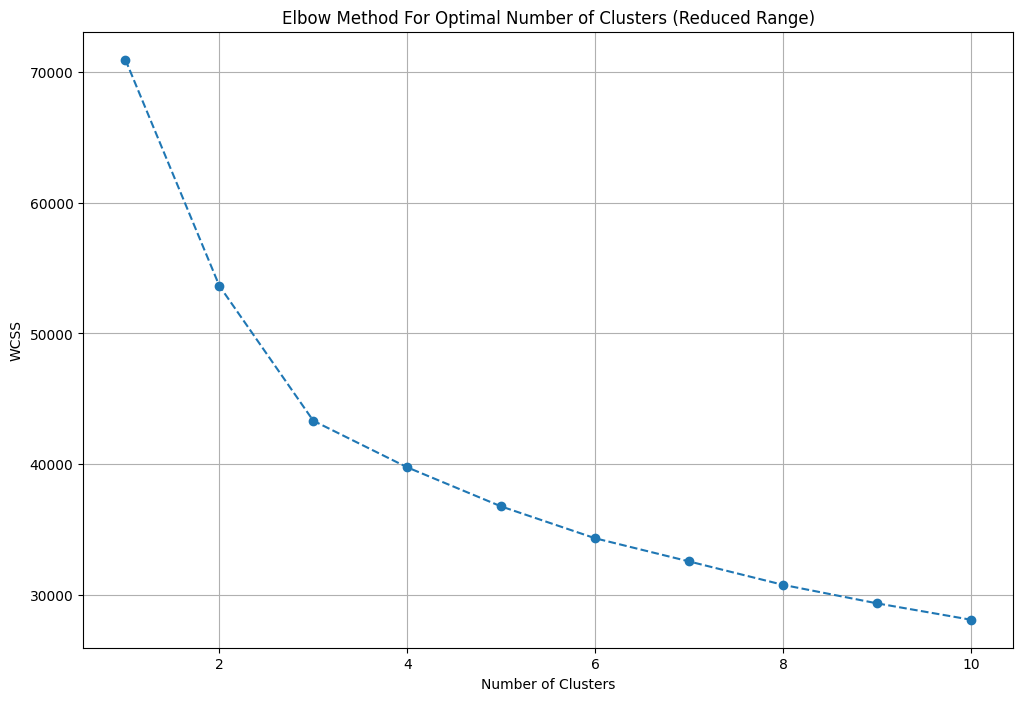

In [55]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [56]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
df = df.iloc[:,:-18]

In [58]:
df['furnishing_type'] = cluster_assignments

In [59]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

furnishDetails  furnishing_type
3853  ['5 AC', 'No Bed', 'No Chimney', 'No Curtains'...                0
2530  ['4 Fan', '1 Exhaust Fan', '1 Geyser', '8 Ligh...                1
3170  ['15 Fan', '15 Light', '1 Modular Kitchen', 'N...                1
845                                                 NaN                0
2782  ['5 Fan', '1 Exhaust Fan', '9 Light', '1 Curta...                0

FEATURES

In [60]:
pd.set_option('display.max_colwidth', None)

In [61]:
df[['society','features']].sample(5)

society  \
951            dlf park place   
3684              independent   
153                bptp terra   
2113       dlf express greens   
1873  indiabulls centrum park   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         features  
951                                                                                                            ['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']  
3684                                                                                                                                                                                                                                                                                    ['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Park', 'Internet/wi-fi connectivity', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']  
153                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           NaN  
2113                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']  
1873  ['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']

In [62]:
df['features'].isnull().sum()

705

In [65]:
import pandas as pd
app_df = pd.read_csv('/content/appartments.csv')
app_df.head(2)

PropertyName                               PropertySubName  \
0  Smartworld One DXP  2, 3, 4 BHK Apartment in Sector 113, Gurgaon   
1           M3M Crown     3, 4 BHK Apartment in Sector 111, Gurgaon   

                                                                                                                                  NearbyLocations  \
0                                           ['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']   
1  ['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    LocationAdvantages  \
0         {'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}   
1  {'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}   

                                                                          Link  \
0  https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415   
1           https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068   

                                                                                                                                                                                                                                                                                                                                                                                           PriceDetails  \
0  {'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}   
1                                                                                                       {'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}   

                                                                                                                                   TopFacilities  
0                     ['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']  
1  ['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']

In [66]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [67]:
temp_df = df[df['features'].isnull()]

In [68]:
temp_df.shape

(705, 26)

In [69]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [70]:
df.loc[temp_df.index,'features'] = x.values

In [71]:
df['features'].isnull().sum()

549

In [72]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [73]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [74]:
features_binary_df.sample(5)

24/7 Power Backup  24/7 Water Supply  24x7 Security  ATM  \
1832                  0                  0              0    0   
723                   0                  0              0    0   
2175                  0                  0              0    0   
468                   0                  0              0    0   
251                   0                  0              0    0   

      Aerobics Centre  Air Hockey  Airy Rooms  Amphitheatre  \
1832                0           0           1             0   
723                 0           0           1             0   
2175                0           0           0             0   
468                 0           0           0             0   
251                 1           0           0             0   

      Automated Car Wash  Badminton Court  Bank Attached Property  \
1832                   0                0                       0   
723                    0                0                       1   
2175                   0                0                       0   
468                    0                0                       0   
251                    0                0                       0   

      Banquet Hall  Bar/Chill-Out Lounge  Barbecue  Basketball Court  \
1832             0                     0         0                 0   
723              0                     0         0                 0   
2175             0                     0         0                 0   
468              0                     0         0                 0   
251              0                     1         0                 0   

      Beach Volley Ball Court  Billiards  Bowling Alley  Bus Shelter  \
1832                        0          0              0            0   
723                         0          0              0            0   
2175                        0          0              0            0   
468                         0          0              0            0   
251                         0          0              0            1   

      Business Lounge  CCTV Camera Security  Cafeteria  Car Parking  \
1832                0                     0          0            0   
723                 0                     0          0            0   
2175                0                     0          0            0   
468                 0                     0          0            0   
251                 0                     0          0            0   

      Car wash area  Card Room  Centrally Air Conditioned  Changing Area  \
1832              0          0                          0              0   
723               0          0                          0              0   
2175              0          0                          0              0   
468               0          0                          0              0   
251               0          0                          0              0   

      Children's Play Area  Cigar Lounge  Clinic  Club House  \
1832                     0             0       0           0   
723                      0             0       0           0   
2175                     0             0       0           0   
468                      0             0       0           0   
251                      0             0       0           0   

      Club house / Community Center  Community Hall  Concierge Service  \
1832                              1               0                  0   
723                               1               0                  0   
2175                              0               0                  0   
468                               1               0                  0   
251                               0               0                  0   

      Conference room  Creche/Day care  Cricket Pitch  Doctor on Call  \
1832                0                0              0               0   
723                 0                0              0               0   
2175            

In [75]:
features_binary_df.shape

(3940, 130)

In [76]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

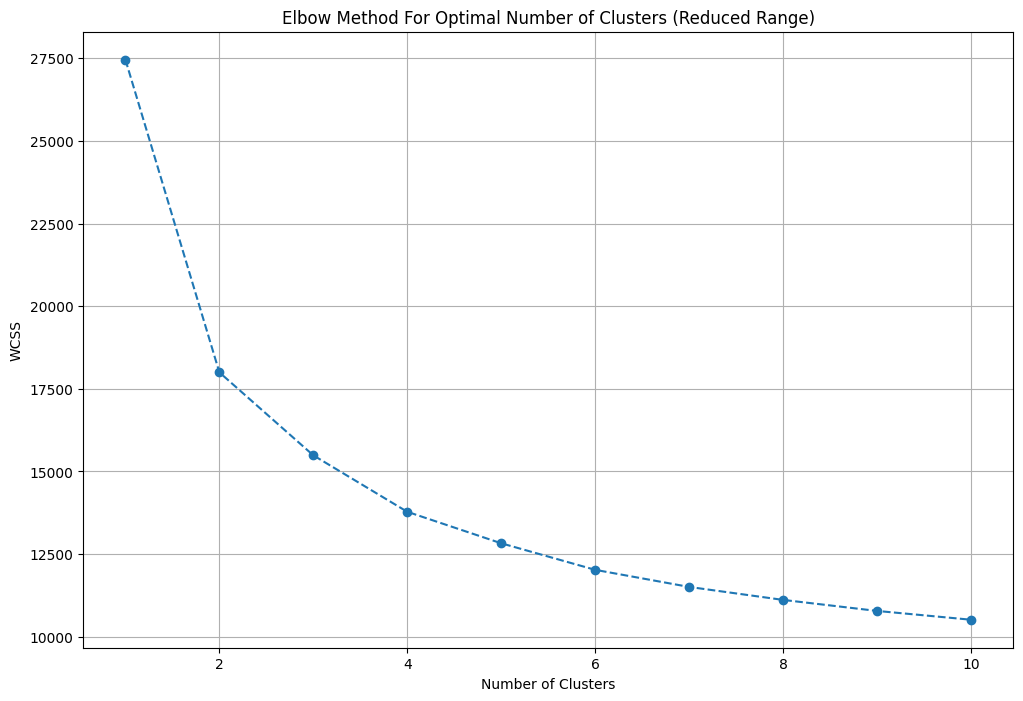

In [77]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [78]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
       'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
        'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [79]:
df['luxury_score'] = luxury_score

In [80]:
df.head()

property_type                 society     sector  price_in_cr  \
0          flat  maa bhagwati residency   sector 3         0.45   
1          flat            apna enclave   sector 3         0.50   
2          flat  tulsiani easy in homes  sector 35         0.40   
3          flat     smart world orchard  sector 61         1.47   
4          flat        parkwood westend  sector 92         0.70   

   price_per_sq.ft  total_area                            areaWithType  \
0           5000.0       900.0          Carpet area: 900 (83.61 sq.m.)   
1           7692.0       650.0          Carpet area: 650 (60.39 sq.m.)   
2           6722.0       595.0          Carpet area: 595 (55.28 sq.m.)   
3          12250.0      1200.0        Carpet area: 1200 (111.48 sq.m.)   
4           5204.0      1345.0  Super Built up area 1345(124.95 sq.m.)   

   bedrooms  bathrooms balconies  additionalRoom  floorNum facing  \
0         2          2         1  not applicable       4.0   West   
1         2          2         1  not applicable       1.0   West   
2         2          2         3  not applicable      12.0    NaN   
3         2          2         2      Study Room       2.0    NaN   
4         2          2         3      Study Room       5.0    NaN   

        agePossession  \
0      Relatively New   
1        Old Property   
2        New Property   
3           Undefined   
4  Under Construction   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispec

In [81]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [82]:
df.sample(5)

property_type                              society      sector  \
2581          flat             maxworth city residences   sector 10   
330           flat                     ansal heights 86   sector 86   
1271          flat                           sobha city  sector 108   
3870         house                          independent   sector 15   
3095         house  international city by sobha phase 1  sector 109   

      price_in_cr  price_per_sq.ft  total_area  \
2581         0.90           7083.0      1271.0   
330          1.30           4666.0      2786.0   
1271         3.95          16858.0      2343.0   
3870         1.45          12393.0      1170.0   
3095         6.30           9000.0      7000.0   

                                                                                                    areaWithType  \
2581                                                                      Super Built up area 1200(111.48 sq.m.)   
330                                                                       Super Built up area 2786(258.83 sq.m.)   
1271                               Super Built up area 2343(217.67 sq.m.)Carpet area: 1512 sq.ft. (140.47 sq.m.)   
3870  Plot area 130(108.7 sq.m.)Built Up area: 130 sq.yards (108.7 sq.m.)Carpet area: 100 sq.yards (83.61 sq.m.)   
3095                                   Built Up area: 7000 (650.32 sq.m.)Carpet area: 4500 sq.ft. (418.06 sq.m.)   

      bedrooms  bathrooms balconies  floorNum facing   agePossession  \
2581         2          2         3       9.0   East    New Property   
330          4          6         2      11.0   East    New Property   
1271         3          4         2      15.0   West  Relatively New   
3870         4          4         2       2.0  North    Old Property   
3095         4          5        3+       2.0   West  Relatively New   

      super_built_up_area  built_up_area  carpet_area  study_room  \
2581               1200.0            NaN          NaN           0   
330                2786.0            NaN          NaN           0   
1271               2343.0            NaN       1512.0           0   
3870                  NaN          130.0        100.0           0   
3095                  NaN         7000.0       4500.0           0   

      servant_room  store_room  pooja_room  others  furnishing_type  \
2581             0           0           0       1                0   
330              1           0           0       1                0   
1271             1           0           0       0                0   
3870             0           0           0       1                0   
3095             0           0           0       0                1   

      luxury_score  
2581            52  
330             86  
1271            49  
3870            13  
3095           122

In [83]:
df.shape

(3940, 23)

In [84]:
df.to_csv('gurgaon_flat_house_joined1_cleaned_v2.csv',index=False)